# <font color="#fc033d" size = 30px>Case Study 10 - Probability- Athul P J</font>

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
pd.get_option("display.max_columns",None)
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [74]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [76]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [77]:
y = df['class']

x = df.drop(['class'],axis=1)
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [78]:
print(x.shape)
print(y.shape)

(8124, 22)
(8124,)


In [79]:
from sklearn.preprocessing import LabelEncoder

x=x.apply(LabelEncoder().fit_transform)
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [80]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y,random_state=42,test_size=0.2)

print(xtrian.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(6499, 22)
(1625, 22)
(6499,)
(1625,)


In [81]:
xtrain.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7873,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
6515,5,2,4,0,2,1,0,1,0,1,...,2,7,7,0,2,1,0,7,4,4
6141,2,3,2,0,8,1,0,1,0,1,...,2,6,7,0,2,1,0,7,4,2
2764,2,0,4,1,5,1,0,0,9,1,...,2,3,6,0,2,1,4,3,4,0
438,0,3,9,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,3


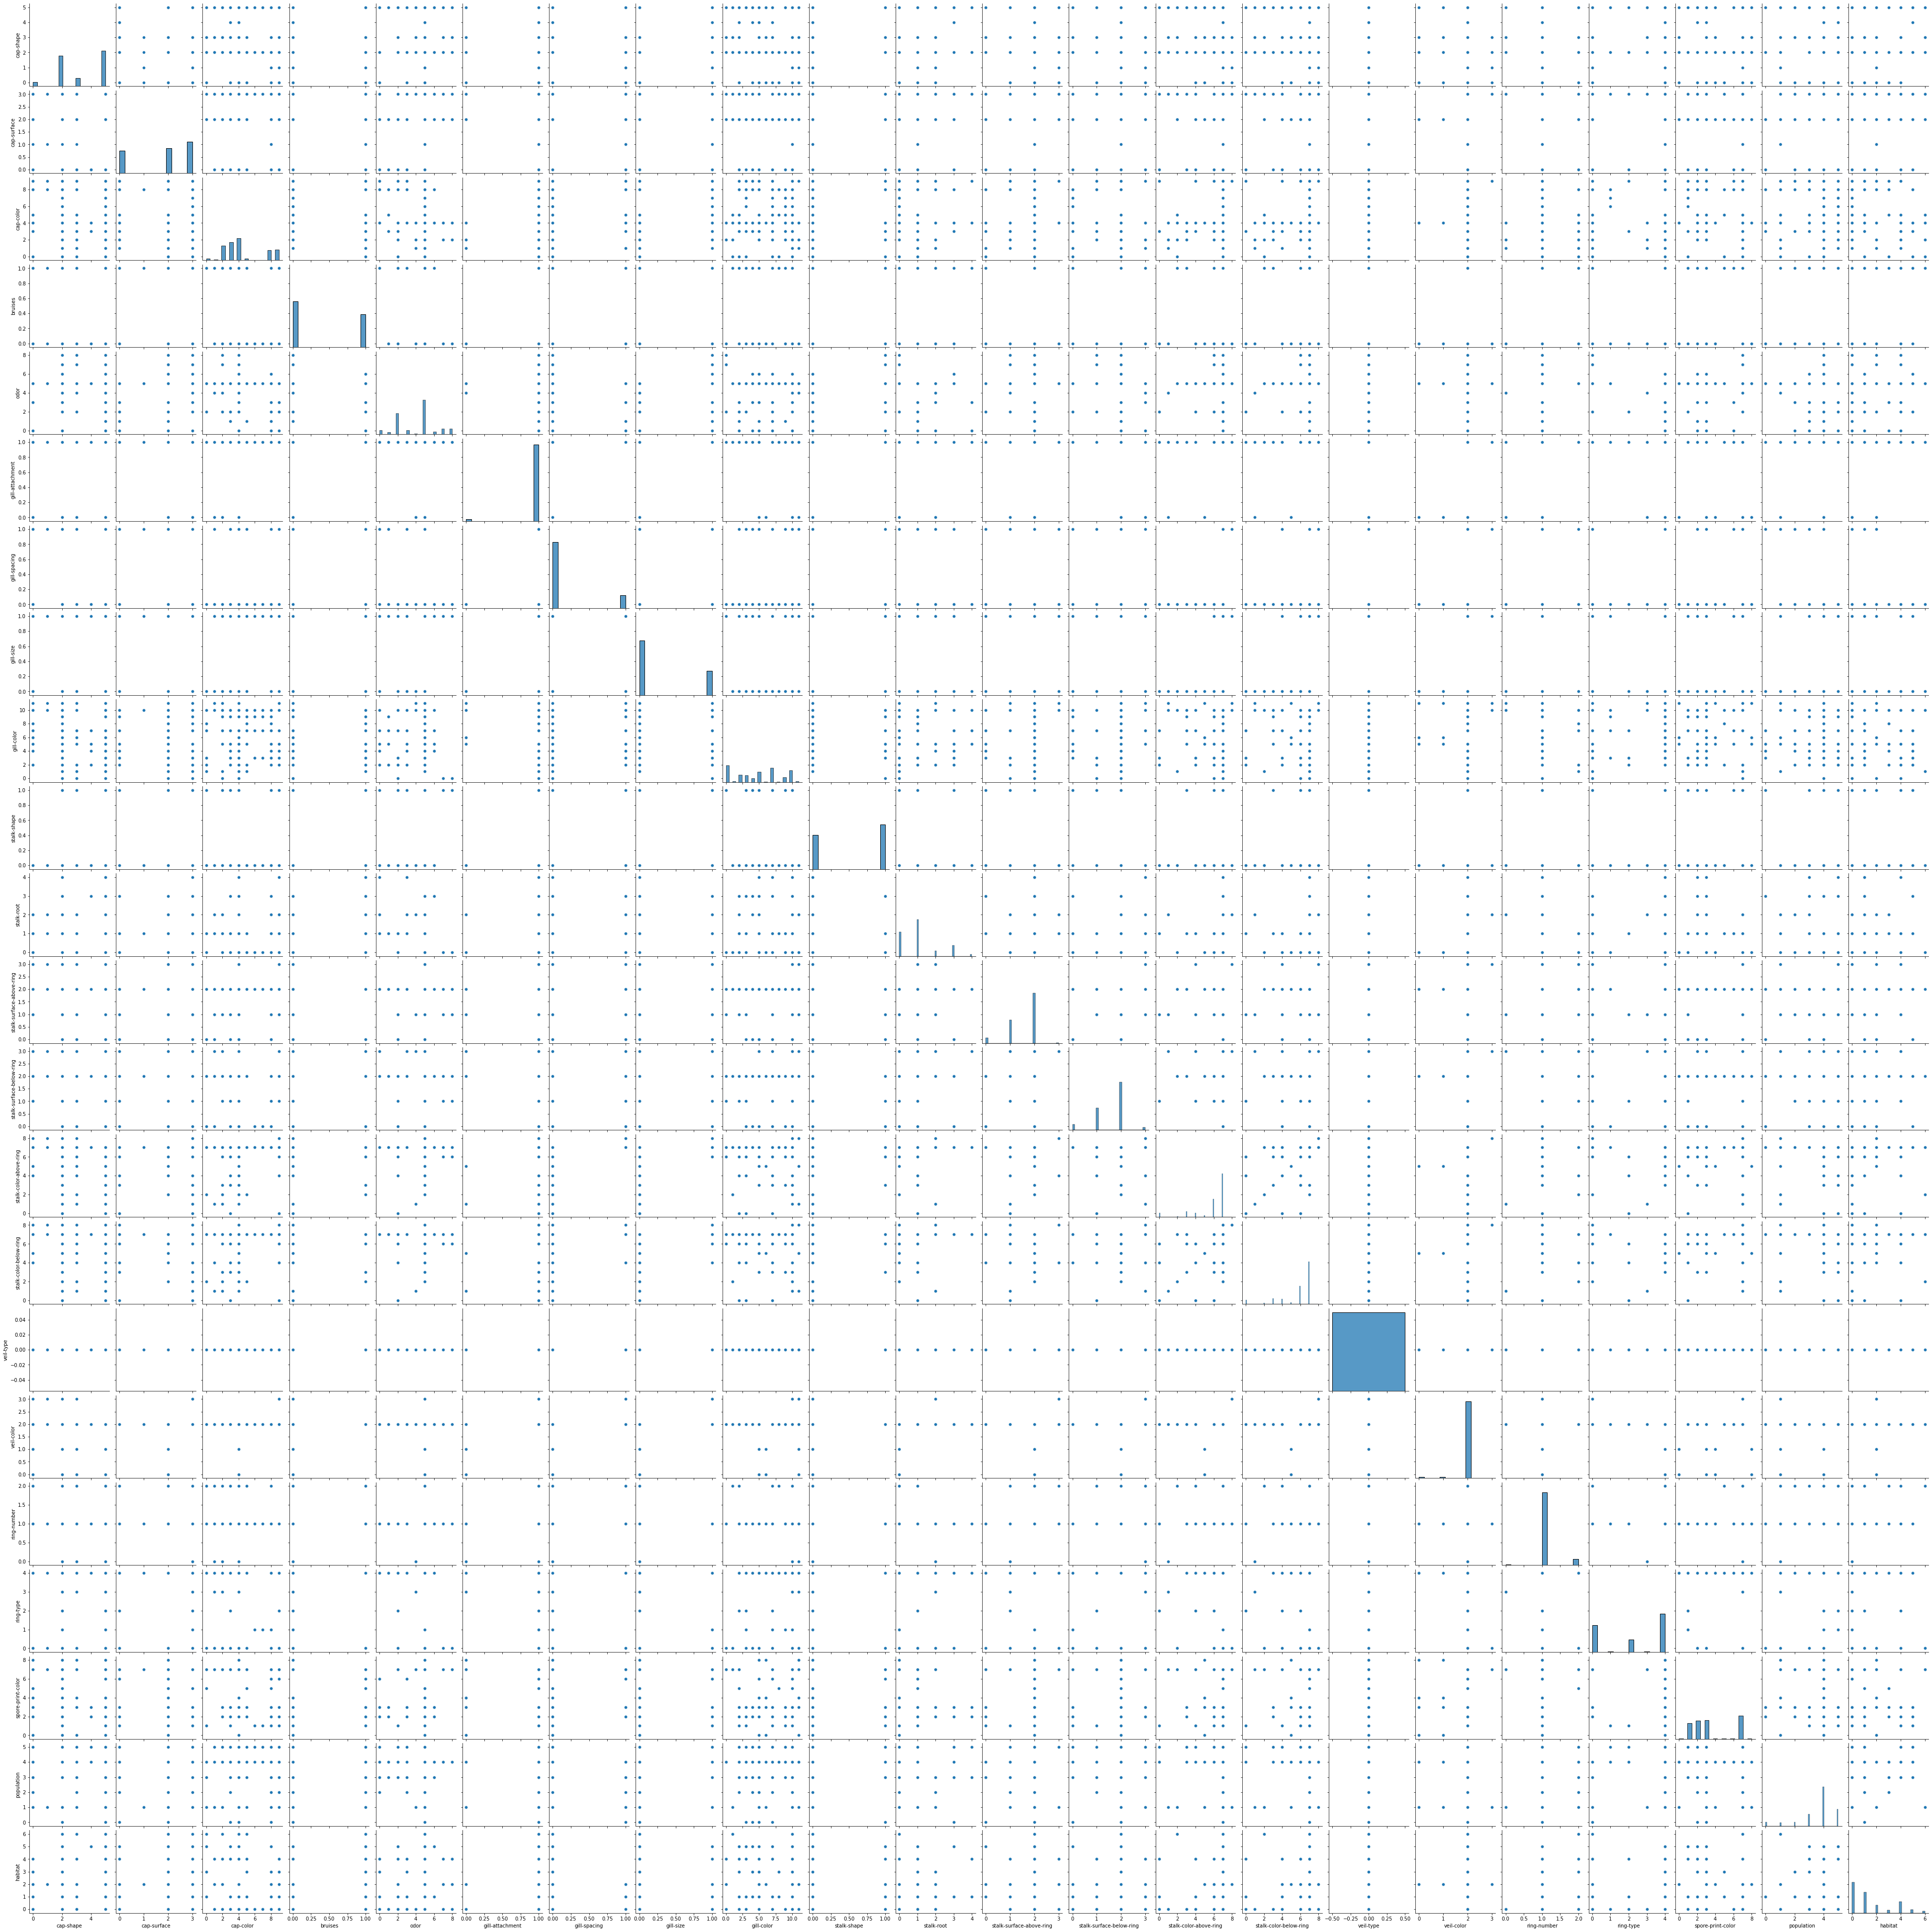

In [86]:
sns.pairplot(x)

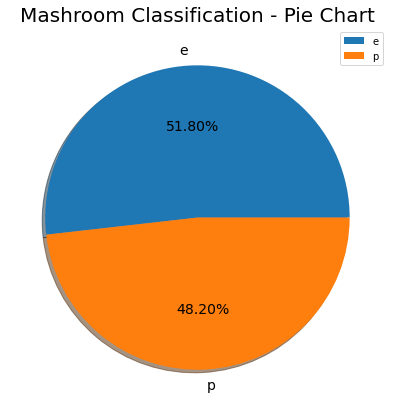

In [106]:
plt.figure(figsize=(7,7))
l=df['class'].value_counts()
plt.pie(l,labels=l.index,shadow=True, textprops={'fontsize': 14},autopct='%1.2f%%')
plt.legend(fontsize=10,loc="best")
plt.title("Mashroom Classification - Pie Chart",fontsize=20)
plt.show()

In [107]:
# From the above fig its visible that nearlt half of the mashrooms are poisions

In [83]:
from sklearn.metrics import accuracy_score,f1_score


In [88]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric='minkowski')
    classifier.fit(xtrain, ytrain)
    ypred =  classifier.predict(xtest)
    acc = accuracy_score(ytest, ypred)
    acc_values.append(acc)

Text(0, 0.5, 'Accuracy')

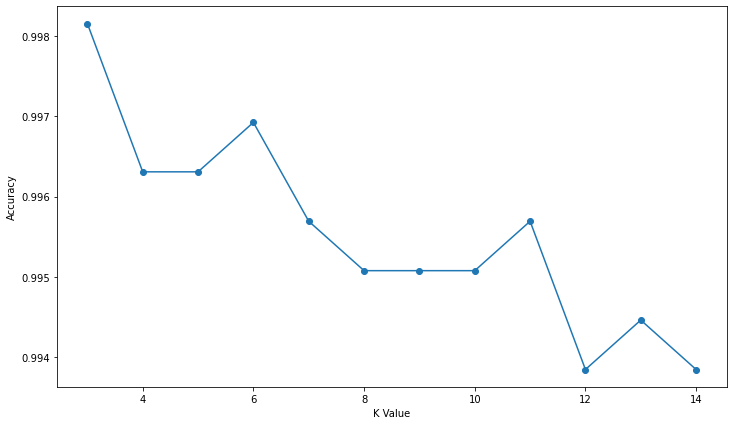

In [90]:
plt.figure(figsize=(12,7))
plt.plot(neighbors,acc_values,'o-')
plt.xlabel("K Value")
plt.ylabel("Accuracy")

In [91]:
classifier = KNeighborsClassifier(n_neighbors = 2, metric='minkowski')
classifier.fit(xtrain, ytrain)
ypred =  classifier.predict(xtest) 

In [93]:
print("Accuracy is : ",accuracy_score(ypred,ytest))
print("F1 Score is : ",f1_score(ypred,ytest, average = 'micro'))

Accuracy is :  0.9993846153846154
F1 Score is :  0.9993846153846154


In [94]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

In [95]:
print("Accuracy is : ",accuracy_score(ypred,ytest))
print("F1 Score is : ",f1_score(ypred,ytest, average = 'micro'))

Accuracy is :  1.0
F1 Score is :  1.0


In [97]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=500)
lr.fit(xtrain,ytrain)

ypred = lr.predict(xtest)

In [98]:
print("Accuracy is : ",accuracy_score(ypred,ytest))
print("F1 Score is : ",f1_score(ypred,ytest, average = 'micro'))

Accuracy is :  0.9476923076923077
F1 Score is :  0.9476923076923076


In [99]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(xtrain,ytrain)
ypred = dtree.predict(xtest)

In [100]:
print("Accuracy is : ",accuracy_score(ypred,ytest))
print("F1 Score is : ",f1_score(ypred,ytest, average = 'micro'))

Accuracy is :  1.0
F1 Score is :  1.0


In [109]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(xtrain,ytrain)
ypred = classifier.predict(xtest)

In [110]:
print("Accuracy is : ",accuracy_score(ypred,ytest))
print("F1 Score is : ",f1_score(ypred,ytest, average = 'micro'))

Accuracy is :  0.9218461538461539
F1 Score is :  0.9218461538461539


In [111]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(xtrain, ytrain)
ypred = classifier.predict(xtest)

In [112]:
print("Accuracy is : ",accuracy_score(ypred,ytest))
print("F1 Score is : ",f1_score(ypred,ytest, average = 'micro'))

Accuracy is :  0.8418461538461538
F1 Score is :  0.8418461538461538


In [114]:
pd.Series(rf.feature_importances_, index = x.columns).sort_values(ascending=False)*100

odor                        16.067074
gill-size                   14.350209
spore-print-color            9.053397
gill-color                   7.464905
stalk-root                   6.969166
ring-type                    6.421164
stalk-surface-below-ring     5.773896
stalk-surface-above-ring     5.425233
population                   5.401854
bruises                      5.102792
gill-spacing                 4.618937
habitat                      2.944521
stalk-shape                  2.120745
stalk-color-below-ring       1.845612
cap-color                    1.492656
stalk-color-above-ring       1.382981
cap-surface                  1.250357
ring-number                  1.123891
cap-shape                    0.534331
veil-color                   0.331484
gill-attachment              0.324795
veil-type                    0.000000
dtype: float64

In [115]:
# Odor and gill-size features have high importance cap-shape, veil-color, gill-attachment, veil-type, has least
# importance

In [116]:
# From the above models KNN is the best model